In [57]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('../data/winequalityN.csv')

# df = df[df['type'] == 'red']
df = df.drop(columns=['type'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Checking for data quality issues

In [58]:
df.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [59]:
df.dropna(inplace=True)

In [60]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Visualizing the data

<Axes: xlabel='quality'>

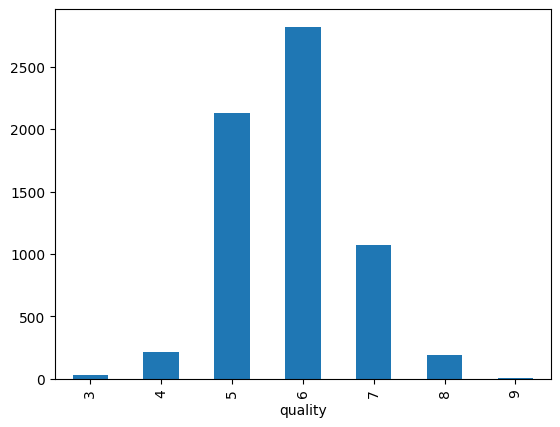

In [61]:
df['quality'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='quality', ylabel='alcohol'>

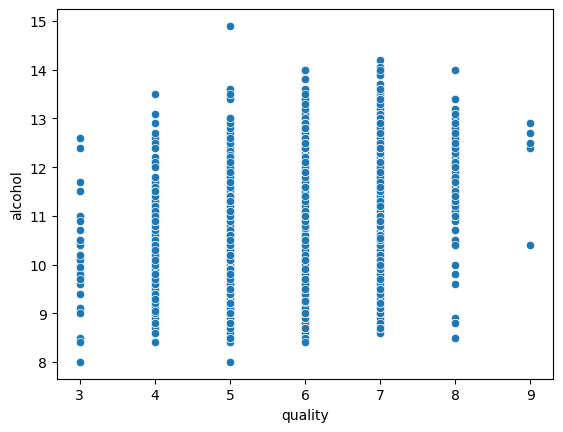

In [62]:
# scatterplot quality and alcohol

sns.scatterplot(data=df, x="quality", y="alcohol")

<Axes: xlabel='quality'>

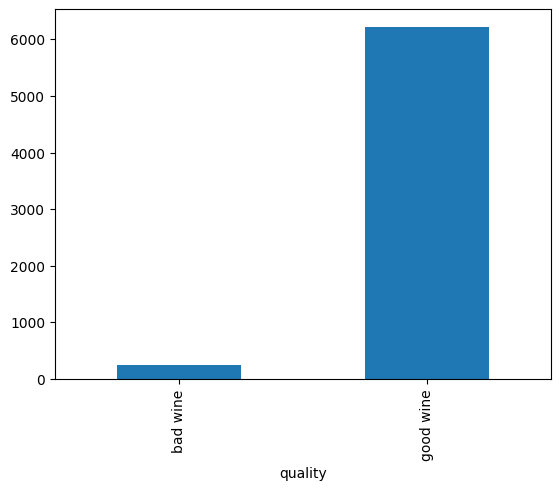

In [63]:
# plot good vs bad wine

df['quality'] = df['quality'].apply(lambda x: "good wine" if x >= 5 else "bad wine")

df['quality'].value_counts().sort_index().plot(kind='bar')

### Check for correlation in the data

<Axes: >

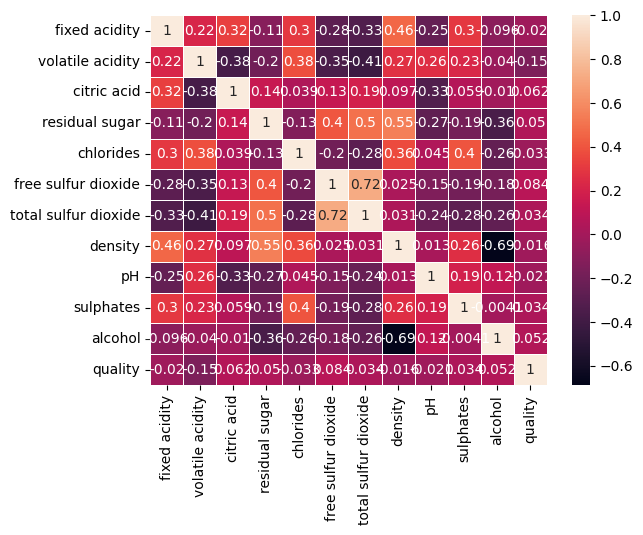

In [64]:
df_corr = df

df_corr['quality'] = df_corr['quality'].apply(lambda x: 1 if x == "good wine" else 0)
sns.heatmap(df_corr.corr(), annot=True, linewidths=.5)

We see that quality is correlated with alcohol, volatile acidity, citric acid and sulphates. We will use these features to predict quality.

### Train a model - Linear Regression

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# define x and y (features and target)
x = df_corr[['alcohol', 'sulphates', 'citric acid', 'volatile acidity']]
y = df_corr['quality']

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

# create model
log_reg = LogisticRegression()

# train model
log_reg.fit(x_train, y_train)

# predict on test data
y_pred = log_reg.predict(x_test)

# check accuracy
accuracy_score(y_test, y_pred)

0.9605568445475638

Linear regression is a simple model that can be used to predict a continuous variable. We will use it to predict quality.

### Train a model - Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics 

# define x and y (features and target)
x = df_corr[['alcohol', 'sulphates', 'citric acid', 'volatile acidity']]
y = df_corr['quality']

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
clf.fit(x_train, y_train) 

# performing predictions on the test dataset 
y_pred = clf.predict(x_test) 

# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)) 


ACCURACY OF THE MODEL:  0.9590100541376644


Random Forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

### Train a model - Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

# define x and y (features and target)
x = df_corr[['alcohol', 'sulphates', 'citric acid', 'volatile acidity']]
y = df_corr['quality']

# create model
gb_model = GradientBoostingClassifier()

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

# train model
gb_model.fit(x_train, y_train)

# predict on test data
y_pred = gb_model.predict(x_test)

# check accuracy
accuracy_score(y_test, y_pred)

0.9559164733178654

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

### Train a model - SVM

In [68]:
from sklearn.svm import SVC

# define x and y (features and target)
x = df_corr[['alcohol', 'sulphates', 'citric acid', 'volatile acidity']]
y = df_corr['quality']

# create model
svm_model = SVC()

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

# train model
svm_model.fit(x_train, y_train)

# predict on test data
y_pred = svm_model.predict(x_test)

# check accuracy
accuracy_score(y_test, y_pred)

0.9597834493426141

SVM is a supervised learning model with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other.